In [1]:
import pandas as pd
import pyreadstat
#pyreadstat is not an optional dependency despite the importerror messages saying so. I tried installing it with conda but it
#said that the package was unavailable. I installed it using pip and had success. I'm not sure if using the two different 
#package managers will cause problems.

In [2]:
CCGA2012df = pd.read_spss('SPSSdataFiles\\2012public.sav')
CCGA2014df = pd.read_spss('SPSSdataFiles\\2014public.sav')
CCGA2016df = pd.read_spss('SPSSdataFiles\\2016ChicagoCouncilSurvey-DataSet.sav')
CCGA2017df = pd.read_spss('SPSSdataFiles\\2017public.sav')
CCGA2019df = pd.read_spss('SPSSdataFiles\\2019 Chicago Council Survey - Datafile.sav')
CCGA2020df = pd.read_spss('SPSSdataFiles\\20-039675-01_Chicago Council_2020 Annual Survey_Main_Client.sav')

**_After all of the files are read in, I might consider merging all of the dataframes into a single dataframe containing just the response to Q21, statistical weight, demographic information like race, gender, age, political identity, and one new column corresponding to the year that the data was collected._**  

In [3]:
print(CCGA2020df)

      CaseID  weight            tm_start           tm_finish   duration  \
0        2.0  0.6498 2020-07-02 11:47:40 2020-07-02 11:56:49   9.150000   
1        3.0  1.1964 2020-07-02 11:49:48 2020-07-02 11:59:13   9.416667   
2        4.0  0.8662 2020-07-02 11:45:44 2020-07-02 11:59:51  14.100000   
3        5.0  0.9899 2020-07-02 11:50:46 2020-07-02 12:00:13   9.450000   
4        7.0  1.4103 2020-07-02 11:49:37 2020-07-02 12:01:49  12.183333   
...      ...     ...                 ...                 ...        ...   
2106  2203.0  1.2401 2020-07-19 14:24:48 2020-07-19 14:56:06  31.283333   
2107  2204.0  1.0211 2020-07-19 17:19:26 2020-07-19 17:28:30   9.066667   
2108  2205.0  0.6626 2020-07-19 16:55:57 2020-07-19 17:45:22  49.416667   
2109  2206.0  0.9713 2020-07-19 18:09:41 2020-07-19 18:25:20  15.650000   
2110  2208.0  1.2000 2020-07-19 19:23:12 2020-07-19 19:47:53  24.666667   

          QFLAG                                  xhispan   xzip      LATITUDE  \
0     Qualified   

In [4]:
len(CCGA2020df)

2111

In [5]:
exceptionalism_2012_mask=CCGA2012df['Q21'] == "The greatest country in the world"
exceptionalism_2014_mask=CCGA2014df['q21'] == "The greatest country in the world"
exceptionalism_2016_mask=CCGA2016df['Q21'] == "The greatest country in the world"
exceptionalism_2017_mask=CCGA2017df['Q21'] == "The greatest country in the world"
exceptionalism_2019_mask=CCGA2019df['Q21'] == "The greatest country in the world"
exceptionalism_2020_mask=CCGA2020df['Q21'] == "The greatest country in the world"

In [6]:
sample_means_ls = [
    ((len(CCGA2012df[exceptionalism_2012_mask])/len(CCGA2012df))*100),
    ((len(CCGA2014df[exceptionalism_2014_mask])/len(CCGA2014df))*100),
    ((len(CCGA2016df[exceptionalism_2016_mask])/len(CCGA2016df))*100),
    ((len(CCGA2017df[exceptionalism_2017_mask])/len(CCGA2017df))*100),
    ((len(CCGA2019df[exceptionalism_2019_mask])/len(CCGA2019df))*100),
    ((len(CCGA2020df[exceptionalism_2020_mask])/len(CCGA2020df))*100)
]

print(sample_means_ls)

[70.378263185935, 66.46110056925995, 62.73653566229985, 63.44202898550725, 58.76639145216125, 57.555660824253906]


In [7]:
# To get the weighted mean I use a booleanmask to select the values that responded with "The greatest country in the world"
# and put the sum of the weights of those responses over the total of the weights. Effectively treating the response of
# "The greatest country in the world" as equal to 1.

# weighted_mean_formula = (df[weight]*df[response as a number]).sum()/df[weight].sum()

# The way that the weights are calculated can differ from year to year. 2017 had like 8 different weight variables.

weighted_means_ls= [
    CCGA2012df[exceptionalism_2012_mask]['weight1'].sum()/CCGA2012df['weight1'].sum(),
    CCGA2014df[exceptionalism_2014_mask]['weight1'].sum()/CCGA2014df['weight1'].sum(),
    CCGA2016df[exceptionalism_2016_mask]['Weight'].sum()/CCGA2016df['Weight'].sum(),
    CCGA2017df[exceptionalism_2017_mask]['Weight1'].sum()/CCGA2017df['Weight1'].sum(),
    CCGA2019df[exceptionalism_2019_mask]['weight'].sum()/CCGA2019df['weight'].sum(),
    CCGA2020df[exceptionalism_2020_mask]['weight'].sum()/CCGA2020df['weight'].sum()
]

weighted_means_ls

[0.7006456420162835,
 0.6469217071957698,
 0.610721606726692,
 0.6291128640809741,
 0.5670888505542082,
 0.5427296651286607]

As for plotting, I should do a bar chart for support for American Exceptionalism for each year by political party. Y axis is percent of respondents who say that the US is "the greatest country in the world." The two bars in the group are Republican and Democrat. So the visualization will demonstrate total support for each year and accurately represent the percentages in the above cells but will seperate those percentages into different bars by political party, (or other demographic variables.)
Age bins will correspond to the Pew Research Center reccommended generational age ranges which can be found here... https://www.beresfordresearch.com/age-range-by-generation/ 

In [8]:
%matplotlib notebook

In [9]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [25]:
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


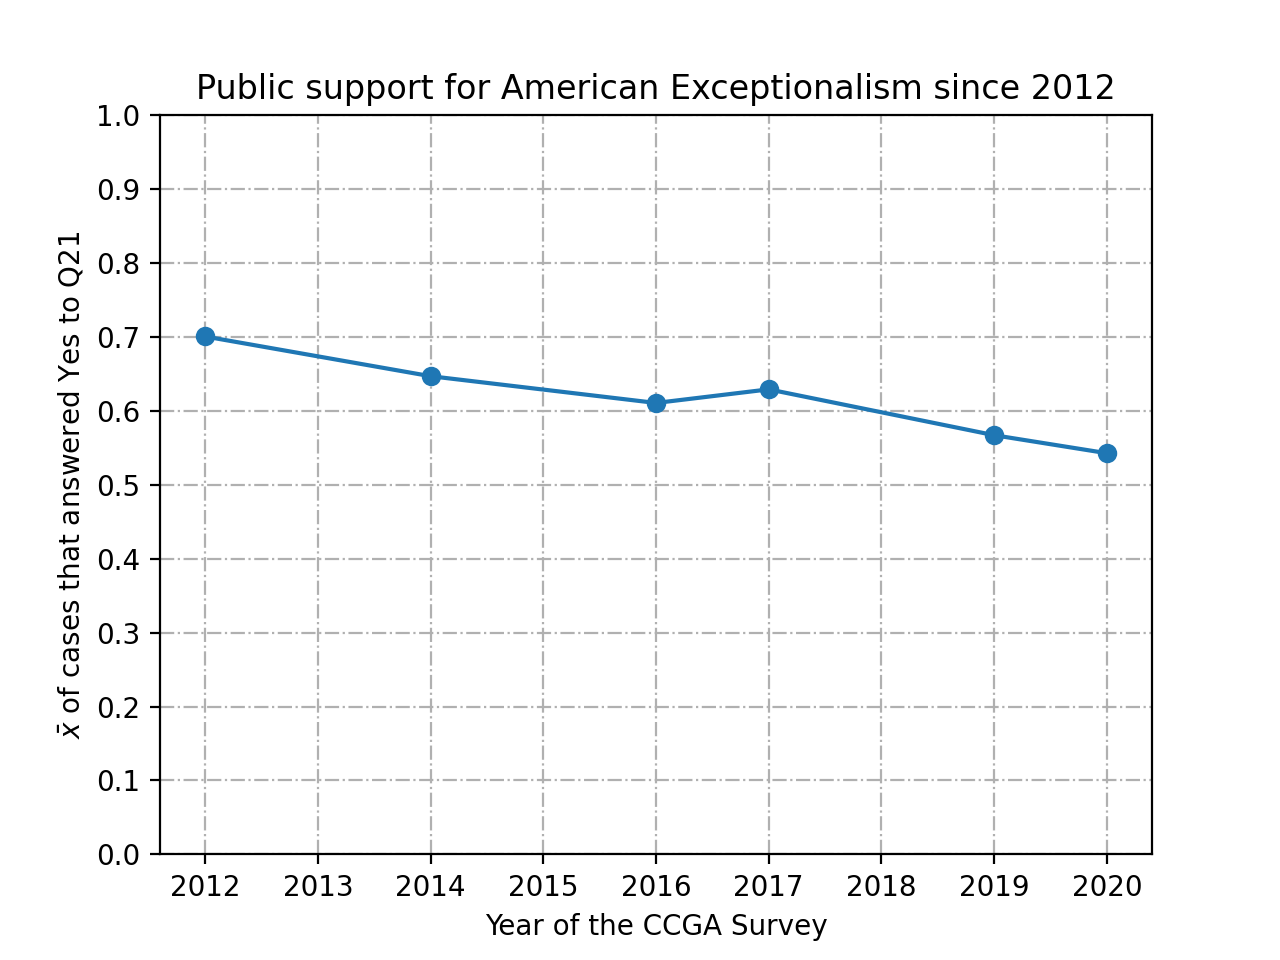

In [33]:
# I should probably have just made a single list of tuples for this to be more efficient and elegant
# but fuckit. I get the same output here.

years_ls = [2012, 2014, 2016, 2017, 2019, 2020]
plt.figure()
plt.plot(years_ls, weighted_means_ls, '-o')
plt.ylim([0,1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Year of the CCGA Survey')
plt.ylabel(r'$\bar{x}$ of cases that answered ''Yes'' to Q21')
plt.title('Public support for American Exceptionalism since 2012')
plt.grid(linestyle='-.')